# Import all the libraries required

In [123]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from datetime import datetime as dt
import matplotlib.image as mpimg

# Extract poll data from fivethirtyeight.com

In [75]:
# URL: https://projects.fivethirtyeight.com/2016-election-forecast/
poll_data_raw = pd.read_csv('http://projects.fivethirtyeight.com/general-model/president_general_polls_2016.csv')
#poll_data_raw.info()

# Mapping of state names

In [ ]:
#Initialise dict with keys set to state names in poll data
state_dict={key: None for key in poll_data_raw["state"].unique()} 

#Read py file with dict with full state names and respective accronym
exec(open('us_state_abbrev.py').read())  

#Manually set value for U.S. (since not in us_state_abbrev.py)
state_dict["U.S."]="US"  

#Set the state accromym as value for the dict with state names in poll data as keys
for k in state_dict:
    if k in us_state_abbrev:
        #Check if there is a complete match
        state_dict[k]=us_state_abbrev[k]
        continue
    else:
        #Check if there is a match with one of the words
        key_words=k.split()
        for l in key_words:
            if l in us_state_abbrev:
                state_dict[k]=us_state_abbrev[l]
                break
            else:
                #print(k+" connot be mapped to abbrev")
                pass

#State codes from cleaned Twitter data (load_json.ipynb made by Mark)            
state_codes=set(['CA', 'NY', 'FL', 'TX', 'IL', 'NJ', 'AZ', 'PA', 'OH', 'MA', 'WA', 'VA',
       'NC', 'MD', 'GA', 'MI', 'TN', 'NV', 'OR', 'CO', 'MO', 'AL', 'IN', 'DC',
       'WI', 'CT', 'SC', 'MN', 'LA', 'IA', 'OK', 'KY', 'NM', 'HI', 'KS', 'UT',
       'MS', 'NH', 'RI', 'ME', 'NE', 'ID', 'AR', 'WV', 'AK', 'DE', 'MT', 'WY',
       'SD', 'VT', 'ND'])

#Check if there are disjoints in state accronyms
#print(state_codes.isdisjoint(state_dict.values()))

# Clean data for visualisation

In [ ]:
# Select columns to be included in the analysis
analysis_columns=['poll_id','createddate','state','samplesize',
                  'adjpoll_clinton','adjpoll_trump','adjpoll_johnson','adjpoll_mcmullin']
poll_data=poll_data_raw[analysis_columns]
poll_data.head()

# Convert date string to date object
poll_data['createddate']=pd.to_datetime(poll_data['createddate'], format='%m/%d/%y')

# Convert state name to state accronym
poll_data['state']=poll_data['state'].apply(lambda x: state_dict[x])

# Add week number column for aggregational purposes
poll_data['weeknumber']=poll_data['createddate'].dt.week

#poll_data.head(15)
#poll_data.weeknumber.unique()
#poll_data[poll_data['weeknumber']<46]

# Slice and dice for visualisation

In [101]:
# function for weighted average in groupby() method
def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

# Create weighted average of poll results with sample size as weight     
clinton=poll_data.groupby(['weeknumber']).apply(wavg, 'adjpoll_clinton', "samplesize")
trump=poll_data.groupby(['weeknumber']).apply(wavg, 'adjpoll_trump', "samplesize")

# Visualise

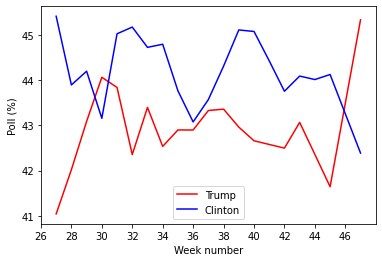

In [125]:
fig,ax =  plt.subplots()
ax.plot(trump[25:45],c='r',label='Trump')
ax.plot(clinton[25:45],c='b',label='Clinton')
ax.set_xlabel("Week number")
ax.xaxis.set_ticks(np.arange(26, 47, 2))
ax.set_ylabel("Poll (%)")
ax.legend()
plt.show()

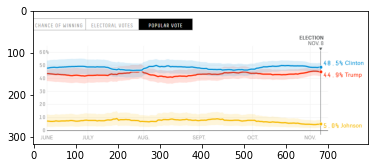

In [124]:
img = mpimg.imread('Knipsel.png')
plt.imshow(img)
plt.show()